<a href="https://colab.research.google.com/github/StephenSheng1101/DMprac/blob/main/MockPracticalTest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

In [30]:
#1.    Load the data
df = pd.read_csv('heart.csv')

#2.    Take a quick look at the data such as using head, describe, info
print(df.head())
print(df.info())
print(len(df))
print(df.describe())

   age     sex                cp  trtbps  chol    fbs  restecg  thalachh exng  \
0   63    male      asymptomatic     145   233   True        0       150   no   
1   37    male  non-anginal pain     130   250  False        1       187   no   
2   41  female   atypical angina     130   204  False        0       172   no   
3   56    male   atypical angina     120   236  False        1       178   no   
4   57  female    typical angina     120   354  False        1       163  yes   

   oldpeak          slp  ca output  
0      2.3  downsloping   0   high  
1      3.5  downsloping   0   high  
2      1.4    upsloping   0   high  
3      0.8    upsloping   0   high  
4      0.6    upsloping   0   high  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    object 
 2   cp        303 non-null   

In [31]:
#3 Split your data into training and test set (no data snooping!)
from sklearn.model_selection import train_test_split


train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

print("Length of train_set:", len(train_set))
print("Length of test_set:", len(test_set))

Length of train_set: 242
Length of test_set: 61


In [32]:
#Explore data and visualize the data to gain insights
# 4a Identify % missing values
missing_percentage = (train_set.isnull().sum() / len(train_set)) * 100
missing_percentage

age         0.0
sex         0.0
cp          0.0
trtbps      0.0
chol        0.0
fbs         0.0
restecg     0.0
thalachh    0.0
exng        0.0
oldpeak     0.0
slp         0.0
ca          0.0
output      0.0
dtype: float64

In [33]:
#4b. study correlation
corr_matrix = train_set.corr(numeric_only=True)
corr_matrix["restecg"].sort_values(ascending=False)

restecg     1.000000
thalachh    0.016973
oldpeak     0.009423
ca         -0.042357
trtbps     -0.067485
fbs        -0.073940
age        -0.127500
chol       -0.130684
Name: restecg, dtype: float64

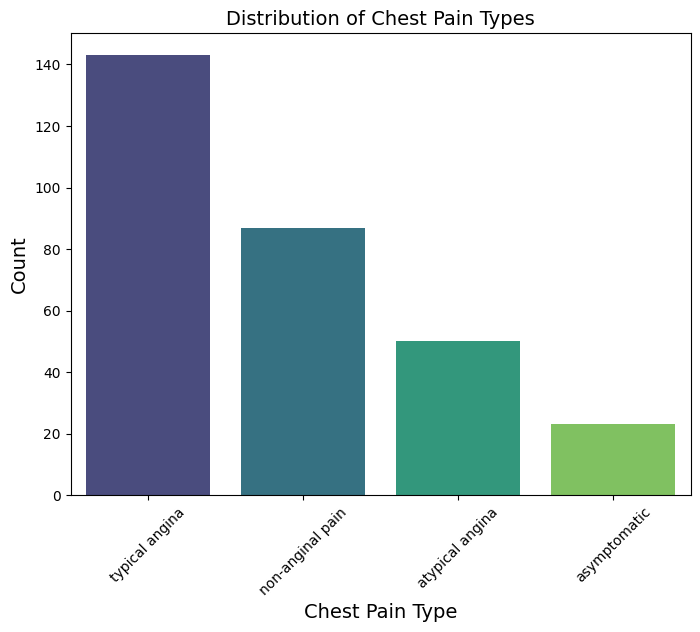

In [34]:
#4c. visualize data
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

#df.hist(bins=50, figsize=(12, 8))
#plt.show()
#1 Diagram of cp
# Count the occurrences of each chest pain type
chest_pain_counts = df['cp'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=chest_pain_counts.index, y=chest_pain_counts.values, palette='viridis')
plt.title('Distribution of Chest Pain Types')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

#2 Diagram of cp


In [35]:
# Exploring categorical variables
categorical_columns = ['sex','cp','fbs','exng','slp','output']
for column in categorical_columns:
    print("\nUnique values in", column)
    print(train_set[column].unique())
    print("Value counts:")
    print(train_set[column].value_counts())

# Analyzing numerical variables
numerical_columns = ['age',  'trtbps','chol',  'restecg', 'thalachh','oldpeak','ca']

for column in numerical_columns:
    print("\nStatistics for", column)
    print("Minimum:", train_set[column].min())
    print("Maximum:", train_set[column].max())
    print("Mean:", train_set[column].mean())
    print("Standard deviation:", train_set[column].std())


Unique values in sex
['male' 'female']
Value counts:
male      159
female     83
Name: sex, dtype: int64

Unique values in cp
['atypical angina' 'typical angina' 'non-anginal pain' 'asymptomatic']
Value counts:
typical angina      110
non-anginal pain     74
atypical angina      41
asymptomatic         17
Name: cp, dtype: int64

Unique values in fbs
[False  True]
Value counts:
False    211
True      31
Name: fbs, dtype: int64

Unique values in exng
['no' 'yes']
Value counts:
no     166
yes     76
Name: exng, dtype: int64

Unique values in slp
['upsloping' 'flat' 'downsloping']
Value counts:
upsloping      117
flat           110
downsloping     15
Name: slp, dtype: int64

Unique values in output
['high' 'low']
Value counts:
high    133
low     109
Name: output, dtype: int64

Statistics for age
Minimum: 29
Maximum: 77
Mean: 54.46280991735537
Standard deviation: 9.204492248287295

Statistics for trtbps
Minimum: 94
Maximum: 192
Mean: 130.3595041322314
Standard deviation: 16.82885823407632

In [38]:
# Experience with Attribute Combination

In [ ]:
heart = train_set.drop('output', axis=1) #input features
heart_labels = train_set['output'].copy() #y, target variable, dependent variable


In [41]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

categorical_columns = ['sex','cp','fbs','exng','slp','output']
numerical_columns = ['age',  'trtbps','chol',  'restecg', 'thalachh','oldpeak','ca']

num_pipeline = make_pipeline(
    SimpleImputer(strategy = "median"),
    StandardScaler()

)
cat_pipeline = make_pipeline(
    SimpleImputer(strategy = "most_frequent"),
    OneHotEncoder(handle_unknown="ignore")

)

preprocessing = ColumnTransformer([
    ("num", num_pipeline, numerical_columns),
    ("cat", cat_pipeline, categorical_columns),

])
